# Qwen/Qwen2-VL-72B-Instruct critic

In [1]:
from transformers import Qwen2VLForConditionalGeneration, AutoTokenizer, AutoProcessor
import torch
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
from PIL import Image

from src.misc import generate_response

OMP: Warning #234: OMP_NUM_THREADS: Invalid symbols found. Check the value "".


In [2]:
torch.cuda.is_available()
torch.cuda.device_count()
torch.cuda.current_device()
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-80GB'

In [3]:
model = Qwen2VLForConditionalGeneration.from_pretrained(
    "Qwen/Qwen2-VL-72B-Instruct", 
    torch_dtype="auto", 
    device_map="auto",
)

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/108k [00:00<?, ?B/s]

model-00001-of-00038.safetensors:   0%|          | 0.00/3.89G [00:00<?, ?B/s]

model-00002-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00003-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00004-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00005-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00006-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00007-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00008-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00009-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00010-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00011-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00012-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00013-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00014-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00015-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00016-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00017-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00018-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00019-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00020-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00021-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00022-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00023-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00024-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00025-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00026-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00027-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00028-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00029-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00030-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00031-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00032-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00033-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00034-of-00038.safetensors:   0%|          | 0.00/3.81G [00:00<?, ?B/s]

model-00035-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00036-of-00038.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00037-of-00038.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

model-00038-of-00038.safetensors:   0%|          | 0.00/2.49G [00:00<?, ?B/s]

`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/38 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [6]:
# print(model)

In [4]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen2-VL-72B-Instruct", use_fast=False, trust_remote_code=True)
processor = AutoProcessor.from_pretrained("Qwen/Qwen2-VL-72B-Instruct", trust_remote_code=True)

In [5]:
if "<image>" not in tokenizer.get_vocab():
    tokenizer.add_special_tokens({"additional_special_tokens": ["<image>"]})
    model.resize_token_embeddings(len(tokenizer))

## 1. House plan

The goal of this experiment is to check the VLM's performance acting as a critic over the architectural plans. This includes correct describing given drawings as well as meaningful proposals of the plan improvements. 

In [7]:
# Plan of a russian single-storey house
image = Image.open("../data/Plan_1_1084x700.jpg")

Construct a prompt to guide the model to act as a VLM critic.

The prompt strategy is:
1. Ask the model to analyze the provided architectural plan image.
2. Instruct it to evaluate the design based on architectural standards, ergonomics, and compliance.
3. Request specific improvement suggestions.

In [8]:
prompt = (
    "You are a professional architect and building standards expert solving the task as a critic of the provided solution. "
    "You are given an architectural floor plan: <image>. "
    "Describe the plan and most importantly find and list all the windows an doors and remember this information. "
    "Evaluate the quality of this particular plan. "
    "Assess if the given particular plan meets architectural standards and ergonomic principles, "
    "and suggest improvements to enhance the usability, compliance, and design clarity of the given plan. "
    "Give specific improvement suggestions in a form of concrete and measurable steps with the references to specific national and international standards."
)

In [9]:
output_text = generate_response(model, processor, prompt, image)

In [27]:
display(Markdown(output_text[0]))

The architectural floor plan provided is a two-story residential layout. Here is a detailed description of the plan, including the windows and doors, and an evaluation of its quality based on architectural standards and ergonomic principles:

### Description of the Plan:

#### Ground Floor:
- **Living Room (17.63 m²)**: Located centrally, with access to the kitchen and dining area.
- **Kitchen (10.24 m²)**: Adjacent to the living room, with a direct entrance from the exterior.
- **Dining Area**: Integrated with the kitchen, providing a combined living and dining space.
- **Hallway (7.86 m²)**: Connects the living room, kitchen, and dining area.
- **Bathroom (3.85 m²)**: Contains a toilet and sink.
- **Boiler Room (3.19 m²)**: Located near the bathroom, providing utility space.
- **Tambour (2.48 m²)**: A small, enclosed space, possibly for storage or laundry.
- **Cyclist Entrance (2.00 m²)**: A small entrance for cyclists, located near the boiler room.

#### First Floor:
- **Bedroom 1 (9.28 m²)**: Located near the bathroom, providing a private space.
- **Bedroom 2 (11.70 m²)**: Larger bedroom, possibly for a family member or guest.
- **Bedroom 3 (13.20 m²)**: The largest bedroom, likely for a primary occupant.
- **Hallway**: Connects the bedrooms and the bathroom.

### Windows and Doors:
- **Living Room**: Multiple windows for natural light.
- **Kitchen**: Windows for natural light and ventilation.
- **Dining Area**: Windows for natural light.
- **Bathroom**: Windows for ventilation.
- **Boiler Room**: Windows for ventilation.
- **Tambour**: Windows for ventilation.
- **Cyclist Entrance**: Windows for ventilation.

### Evaluation and Suggestions:

#### Architectural Standards and Ergonomic Principles:
1. **Accessibility**: The plan meets basic accessibility standards, with a cyclist entrance and a bathroom on the ground floor.
2. **Natural Light**: The plan incorporates multiple windows to allow natural light into the living areas, which is a positive aspect.
3. **Ventilation**: The plan includes windows for ventilation in the bathroom and boiler room, which is essential for maintaining indoor air quality.
4. **Privacy**: The bedrooms are well-separated from the living areas, providing privacy for occupants.

#### Improvements:
1. **Balcony or Deck**: Adding a balcony or deck area off the living room or dining area would enhance the outdoor living space and provide additional natural light.
2. **Storage**: Incorporating more storage spaces, such as built-in cabinets or shelves, would improve the usability of the space.
3. **Separate Entrance**: Creating a separate entrance for guests or visitors would provide more privacy and convenience.
4. **Energy Efficiency**: Adding insulation to the walls and windows, and incorporating energy-efficient appliances would improve the building's energy efficiency.
5. **Open Plan**: Consider an open-plan layout for the living, dining, and kitchen areas to create a more spacious and open feel.
6. **Lighting**: Incorporating more controlled lighting options, such as dimmable lights, would allow for better control over the lighting in different areas.

### Conclusion:
The provided floor plan is a well-organized residential layout that meets basic architectural standards and ergonomic principles. However, there are opportunities for improvement in terms of additional outdoor spaces, storage, and energy efficiency. Implementing these suggestions would enhance the usability, compliance, and design clarity of the plan.

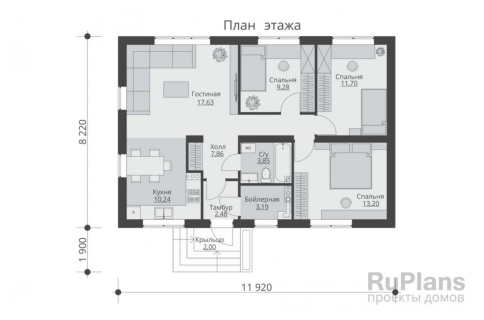

In [10]:
# Plan of a russian single-storey house
plt.figure(figsize=(6, 4))
plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
# Plan of a swedish house
image_2 = Image.open("../data/Plan_2_1920x1440.jpg")
output_text = generate_response(model, processor, prompt, image_2)
display(Markdown(output_text[0]))

OutOfMemoryError: CUDA out of memory. Tried to allocate 11.81 GiB. GPU 0 has a total capacity of 79.15 GiB of which 1.24 GiB is free. Including non-PyTorch memory, this process has 32.50 GiB memory in use. Process 58984 has 45.39 GiB memory in use. Of the allocated memory 31.63 GiB is allocated by PyTorch, and 384.12 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)